In [1]:
import inspire_agrivolt
    
from dask.distributed import Client, LocalCluster

from pathlib import Path
import xarray as xr

In [2]:
cluster = LocalCluster(
    n_workers=8
)

client = cluster.get_client()

print(client.dashboard_link)

/home/tford/.conda-envs/geospatial/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35669 instead
  warnings.warn(


http://127.0.0.1:35669/status


In [ ]:
states = ["alabama",
"arizona",
"arkansas",
"california",
"colorado",
"connecticut",
"delaware",
"florida",
"georgia",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"montana",
"nebraska",
"nevada",
"new_hampshire",
"new_jersey",
"new_mexico",
"new_york",
"north_carolina",
"north_dakota",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode_island",
"south_carolina",
"south_dakota",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west_virginia",
"wisconsin",
"wyoming",]

confs = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10"]

for state in states:
    for conf in confs:
        print(state, conf)

        model_outs_paths = list(Path(f"/projects/inspire/PySAM-MAPS/v1/model-outs/{state}/{conf}").glob("*.zarr"))
        POSTPROCESS_OUTS_ZARR = Path(f"/projects/inspire/PySAM-MAPS/v1/postprocess/{state}/{conf}.zarr")

        inspire_agrivolt.beds_postprocessing.postprocessing(
            scenario=conf,
            input_zarr_path=MODEL_OUTS_ZARR,
            output_zarr_path=POSTPROCESS_OUTS_ZARR
        )

In [3]:
state="virginia"
conf="08"

print(state, conf)

model_outs_paths = list(Path(f"/projects/inspire/PySAM-MAPS/v1/model-outs/{state}/{conf}").glob("*.zarr"))
POSTPROCESS_OUTS_ZARR = Path(f"/projects/inspire/PySAM-MAPS/v1/test-postprocess/{state}/{conf}.zarr")

inspire_agrivolt.beds_postprocessing.postprocessing(
    scenario=conf,
    input_zarr_paths=model_outs_paths,
    output_zarr_path=POSTPROCESS_OUTS_ZARR
)

colorado 06
2025-09-23 22:02:54,748 - inspire_agrivolt - INFO - Postprocessing scenario=06 using bed_proc=fixed_tilt_3_beds
2025-09-23 22:02:56,481 - inspire_agrivolt - INFO - using fixed tilt configuration
2025-09-23 22:02:57,256 - inspire_agrivolt - INFO - using farming buffer of 0.1524 m (0.5 ft) non-vertical configuration
2025-09-23 22:02:57,298 - inspire_agrivolt - INFO - Merging outputs...


/home/tford/.conda-envs/geospatial/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 9.96 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


2025-09-23 22:03:49,092 - inspire_agrivolt - INFO - Postprocessing complete


In [4]:
loaded_postprocess_ds = xr.open_zarr(POSTPROCESS_OUTS_ZARR)

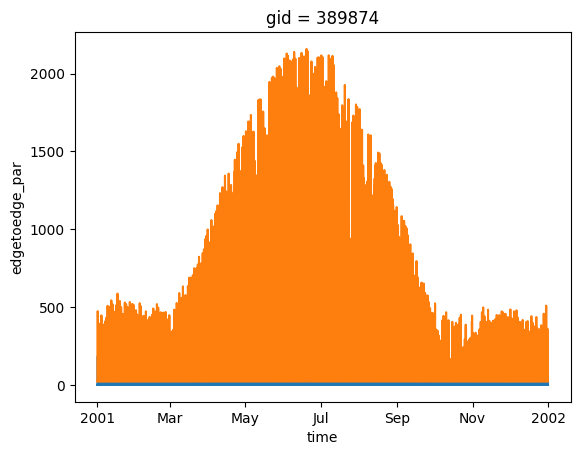

In [9]:
# loaded_postprocess_ds.beda.isel(gid=0).plot()
# loaded_postprocess_ds.bedb.isel(gid=0).plot()
loaded_postprocess_ds.edgetoedge.isel(gid=0).plot()
loaded_postprocess_ds.edgetoedge_par.isel(gid=0).plot()


In [7]:
loaded_postprocess_ds

<xarray.Dataset> Size: 10GB
Dimensions:                                (gid: 17508, time: 8760)
Coordinates:
  * gid                                    (gid) int64 140kB 389874 ... 560852
  * time                                   (time) datetime64[ns] 70kB 2001-01...
Data variables:
    annual_energy_per_acre                 (gid) float64 140kB dask.array<chunksize=(39,), meta=np.ndarray>
    annual_energy_per_kWdc_installed       (gid) float64 140kB dask.array<chunksize=(39,), meta=np.ndarray>
    beda                                   (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    bedb                                   (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    bedc                                   (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    edgetoedge                             (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    edgetoedge_par                         (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    farmable_land_percent                  (gid) float64 140kB dask.array<chunksize=(39,), meta=np.ndarray>
    subarray1_dc_gross_per_acre            (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    subarray1_dc_gross_per_kWdc_installed  (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>
    under_panel                            (gid, time) float64 1GB dask.array<chunksize=(39, 8760), meta=np.ndarray>

In [ ]:
post_ds = xr.open_zarr(
    POSTPROCESS_OUTS_ZARR
)

In [ ]:
post_ds

In [ ]:
post_ds.bedA.plot()

In [ ]:
model_ds = xr.open_zarr(
    MODEL_OUTS_ZARR
)

In [ ]:
model_ds.ground_irradiance.mean(dim="distance").plot()